In [118]:
# 유유상종 K-NN
# 분류 모델 - 새로운 데이터의 클래스 예측


In [119]:
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1] 데이터 준비 - Seaborn에서 제공하는 titanic 데이터셋 가져오기
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [120]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


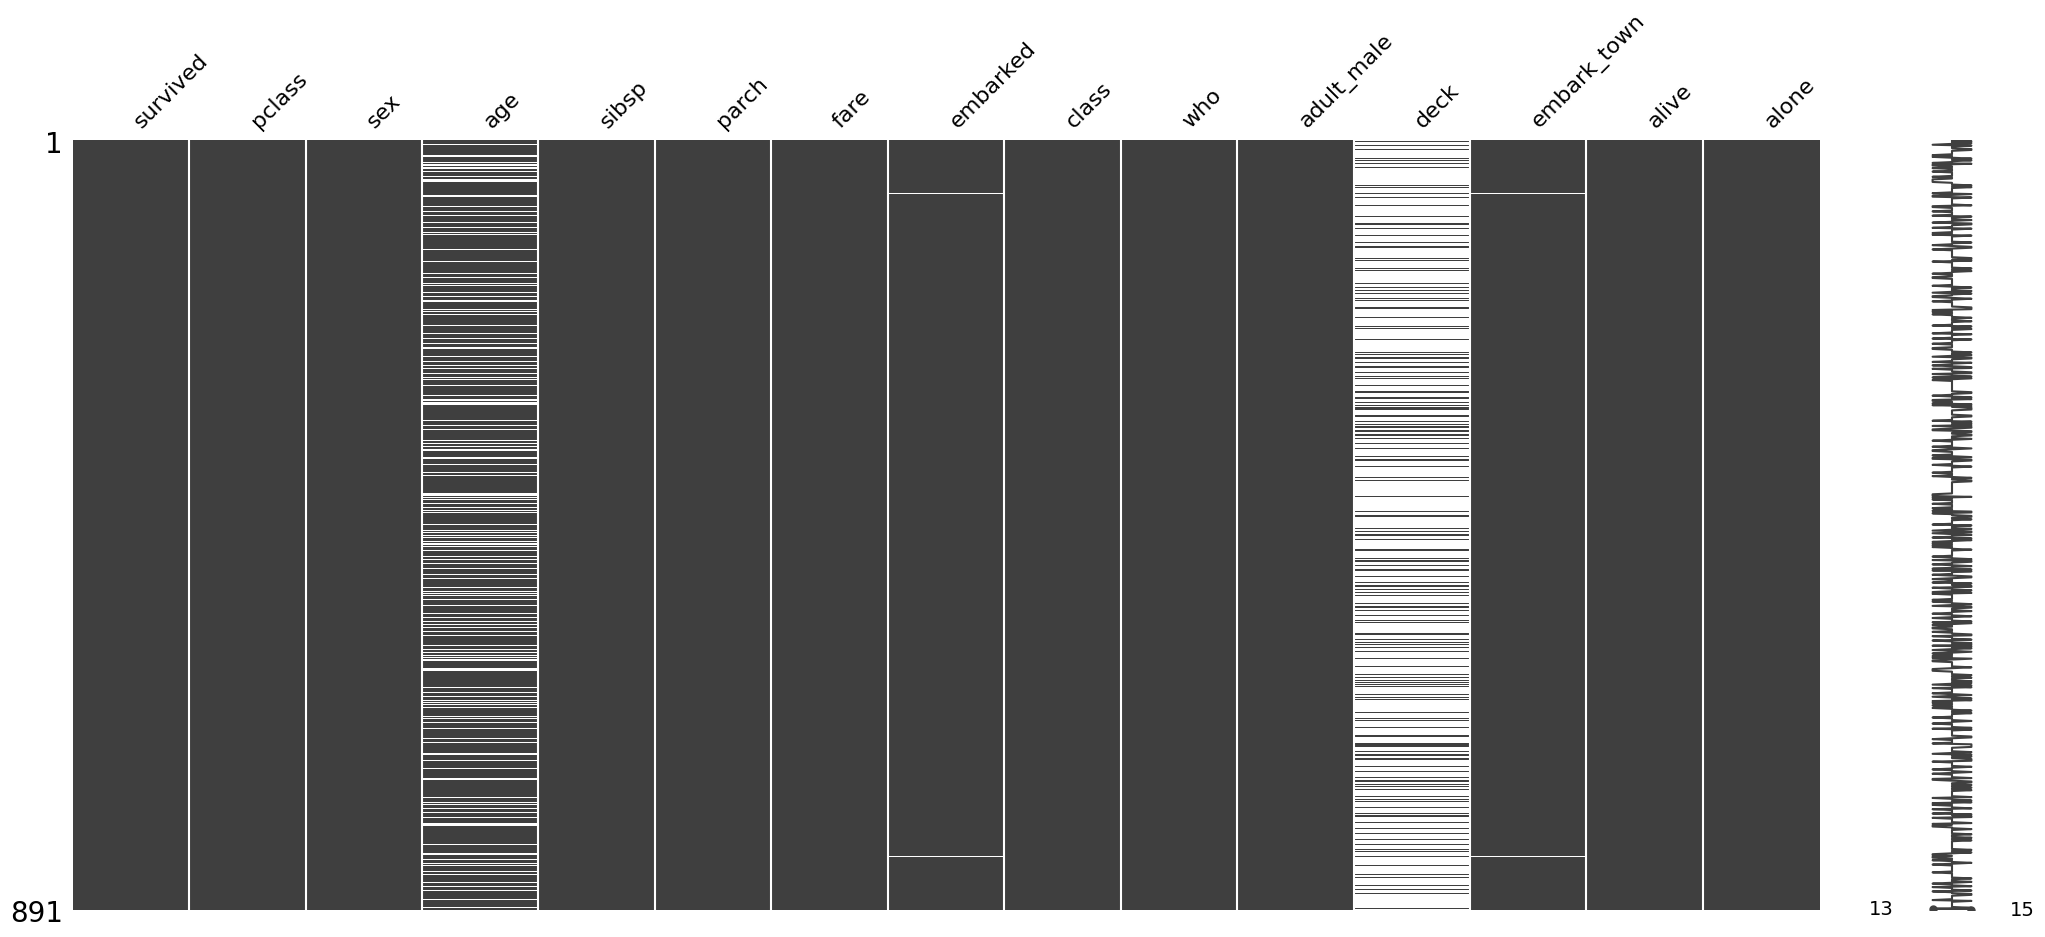

In [121]:
import missingno as msno
msno.matrix(df)
plt.show()

In [122]:
# 데이터 통계 요약정보 확인
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


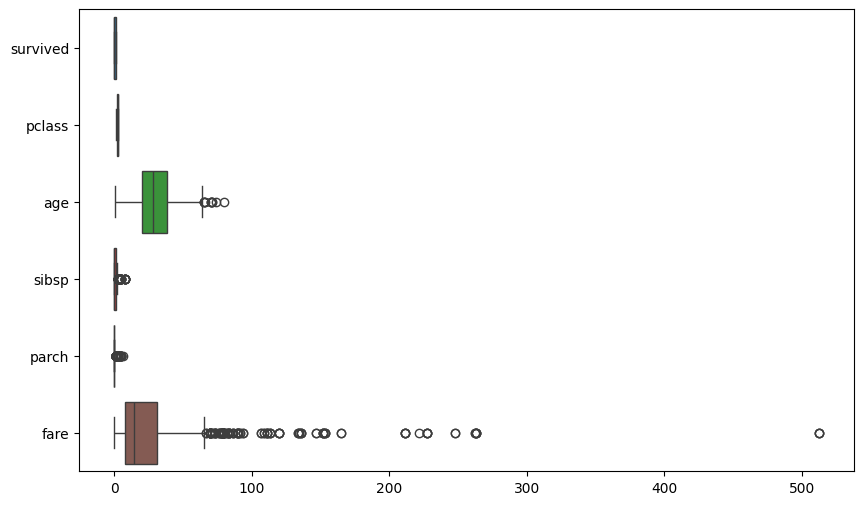

In [123]:
# boxplot을 이용한 수치형 데이터 분포 확인
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']), orient='h')
plt.show()

In [124]:
# 데이터 통계 요약정보 확인 (범주형)
df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [125]:
# 누락 데이터 확인
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [126]:
# 중복 데이터 확인
df.duplicated().sum()

np.int64(107)

In [127]:
# 중복데이터 출력해 보기
df[df.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [128]:
# 목표변수  - 타겟... 정답.. 우리가 알고자 하는것  y
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

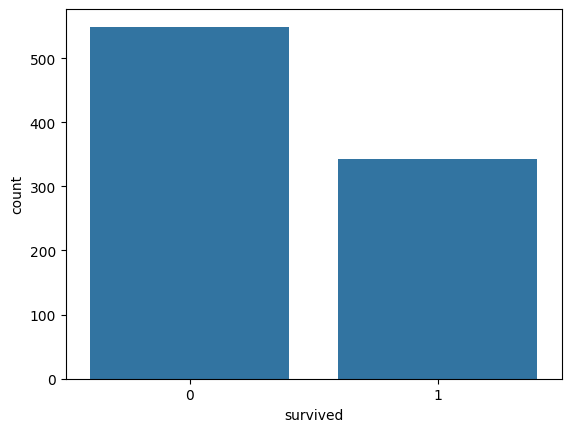

In [129]:
# 목표변수 - 시각화 - 클래스 불균형을 확인
sns.countplot(data=df, x='survived');

In [130]:
# 클래스 불균형 - under sampling


In [131]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


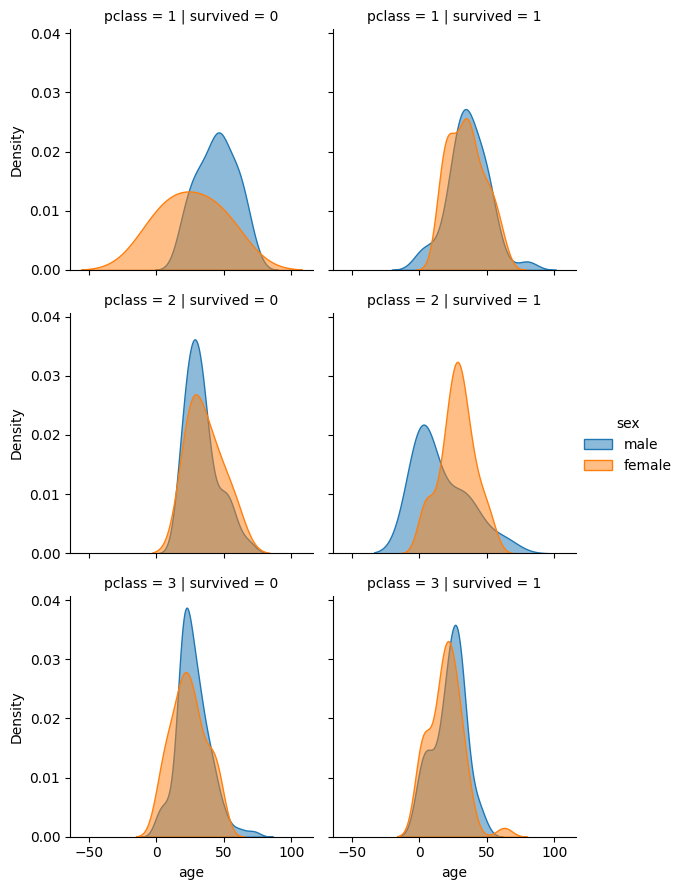

In [132]:
# 시각화 
g = sns.FacetGrid(df, col='survived', row='pclass', hue='sex')
g.map(sns.kdeplot, 'age', alpha=0.5, fill=True)
g.add_legend();

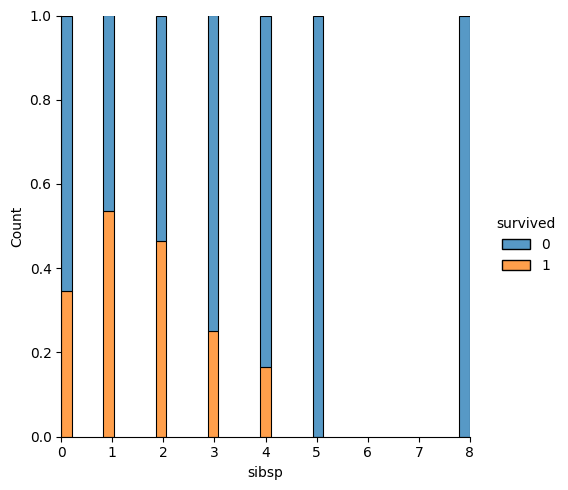

In [133]:
# 시각화 
sns.displot(x='sibsp', kind='hist', hue='survived', data=df, multiple='fill');

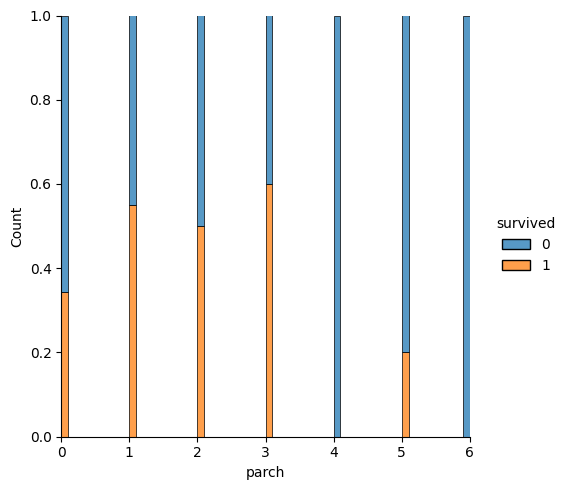

In [134]:
# 시각화 
sns.displot(x='parch', kind='hist', hue='survived', data=df, multiple='fill');

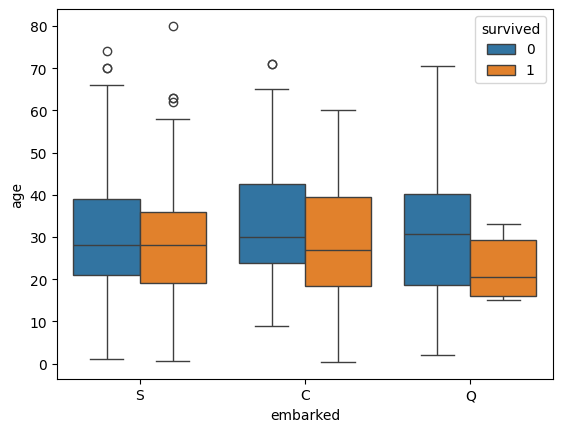

In [135]:
# 시각화 
sns.boxplot(x='embarked', y='age', hue='survived', data=df);

In [136]:
'''
[Step 3] 데이터 전처리
'''

# 중복 데이터 제거
print('중복 제거 이전: ', df.shape)
df = df.drop_duplicates()
print('중복 제거 이후: ', df.shape)

중복 제거 이전:  (891, 15)
중복 제거 이후:  (784, 15)


In [137]:
# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  
rdf.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alive', 'alone'],
      dtype=object)

In [138]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - NaN 값
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  
print(len(rdf))

678


In [139]:
# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
print(most_freq)

S


In [140]:
# mode 메소드 활용 (최빈값)
most_freq2 = rdf['embarked'].mode()[0]   
print(most_freq2)

S


In [141]:
# describe 메소드 활용 (최빈값)
rdf.describe(include='object')

,sex,embarked,who,alive
count,678,676,678,678
unique,2,3,3,2
top,male,S,man,no
freq,422,520,382,394


In [142]:
# 최빈값으로 누락 데이터 치환하기
rdf['embarked'] = rdf['embarked'].fillna(most_freq)

# 결측치 확인하기
rdf.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [143]:
rdf.select_dtypes(include='object').columns

Index(['sex', 'embarked', 'who', 'alive'], dtype='object')

In [144]:
'''
[Step 4] 변수 선택
'''

# 분석에 활용할 열(특성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [145]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf = ndf.drop(['sex', 'embarked'], axis=1)
ndf.head() 

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,False,True,False,False,True
1,1,1,38.0,1,0,True,False,True,False,False
2,1,3,26.0,0,0,True,False,False,False,True
3,1,1,35.0,1,0,True,False,False,False,True
4,0,3,35.0,0,0,False,True,False,False,True


In [146]:
'''
[Step 5] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]    #독립 변수 X
y = ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (474, 9)
test data 개수:  (204, 9)


In [147]:
from collections import Counter
Counter(y)

Counter({0: 394, 1: 284})

In [148]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled,y_resampled = rus.fit_resample(X,y)
print( Counter(y_resampled) )
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, 
                                                    stratify= y_resampled,
                                                    random_state=10) 
print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
Counter(y_train), Counter(y_test)

Counter({0: 284, 1: 284})
train data 개수:  (397, 9)
test data 개수:  (171, 9)


(Counter({0: 199, 1: 198}), Counter({1: 86, 0: 85}))

In [149]:
'''
[Step 6] KNN 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성 (k=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

# train data를 가지고 모형 학습
knn.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 1 0 0 1 1 0 0]
[0 1 0 1 0 0 1 0 0 0]


In [150]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
knn_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(knn_matrix)

[[62 23]
 [20 66]]


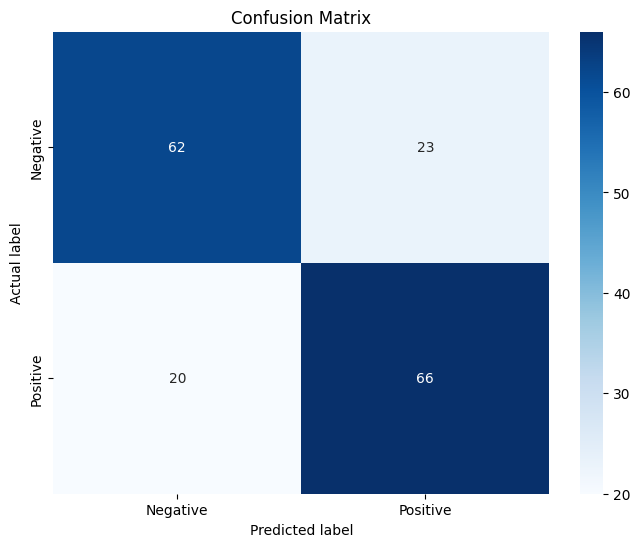

In [151]:
# Confusion Matrix 시각화

plt.figure(figsize=(8, 6))
sns.heatmap(knn_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# 클래스 불균형을 해결하지 않은 모델

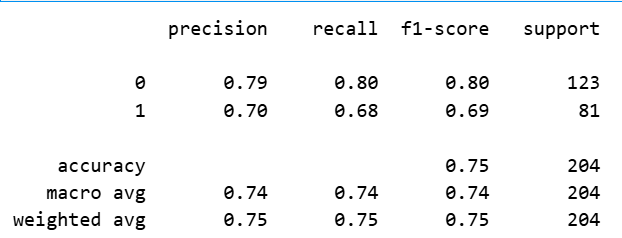

In [ ]:
# 모형 성능 평가 - 평가지표 계산 - 클래스 불균형 해결
knn_report = metrics.classification_report(y_test, y_hat)          
print(knn_report)

              precision    recall  f1-score   support

           0       0.76      0.73      0.74        85
           1       0.74      0.77      0.75        86

    accuracy                           0.75       171
   macro avg       0.75      0.75      0.75       171
weighted avg       0.75      0.75      0.75       171



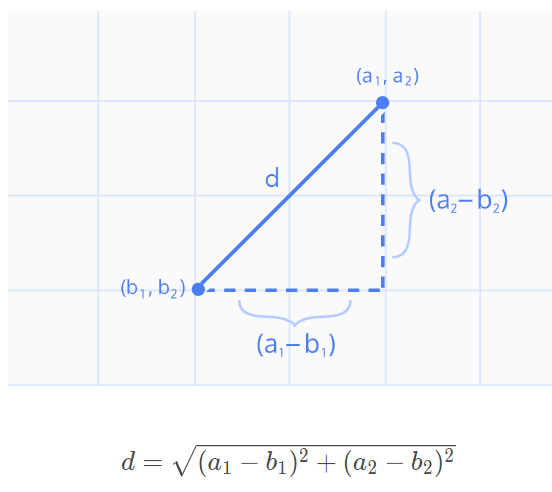

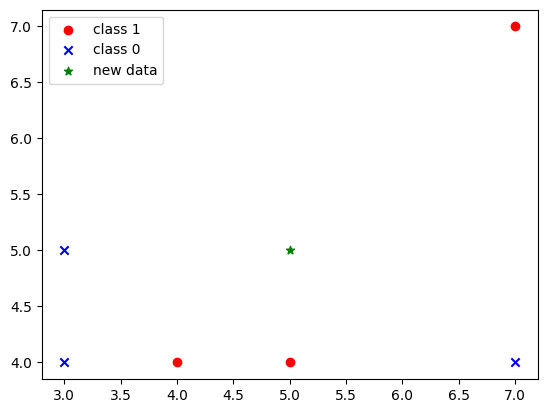

[[3 4]
 [4 4]
 [5 4]
 [3 5]
 [7 7]
 [7 4]]
[[4 1]
 [1 1]
 [0 1]
 [4 0]
 [4 4]
 [4 1]]
각 데이터와의 거리 : [2.23606798 1.41421356 1.         2.         2.82842712 2.23606798]
가장 가까운 데이터의 인덱스 : [2 1 3 0 5 4]
최종 결정 클래스 : 1


In [153]:
# k-nn
import numpy as np
import matplotlib.pyplot as plt
# 데이터 (닷맛 아삭함)
X_train = np.array([ [3,4],[4,4],[5,4],[3,5],[7,7],[7,4] ])  # 학습
y_train = np.array([0,1,1,0,1,0])  # 레이블 또는 클래스
# 새로운 데이터
X_new = np.array([ [5,5] ])  # 테스트
# 시각화로 데이터 분포 확인
plt.scatter(X_train[y_train==1][:,0],X_train[y_train==1][:,1],marker='o',color='r',label='class 1')
plt.scatter(X_train[y_train==0][:,0],X_train[y_train==0][:,1],marker='x',color='b',label='class 0')
plt.scatter(X_new[:,0],X_new[:,1],marker='*',color='g',label='new data')
plt.legend()
plt.show()

#. 1 새로운 데이터와 기존 데이터간의 거리 계산
print(X_train)
print((X_train - X_new)**2)
# 거리공식
dists = np.sqrt(np.sum((X_train - X_new)**2, axis=1)) # axis=1 행방향
print(f'각 데이터와의 거리 : {dists}')

#. 2 가장 가까운 k개의 데이터 선택
k = 3
# 거리를 기준으로 정렬
nearest_neighbors = np.argsort(dists)  # 오름차순 정렬
print(f'가장 가까운 데이터의 인덱스 : {nearest_neighbors}')
topk_neighbors = nearest_neighbors[:k]  # k개 선택
topk_neighbors
y_train[topk_neighbors]  # k개의 레이블
from collections import Counter
Counter(y_train[topk_neighbors]).most_common(1)[0][0]  # 최빈값
print(f'최종 결정 클래스 : {Counter(y_train[topk_neighbors]).most_common(1)[0][0]}')

In [154]:
# k 값의 중요성
# k가 너무작으면.. 가장 가까운데이터에 의존하는데 그 데이터가 이상치(특이한) 예측이 틀릴확률이 높은  과대적합 overfitting
# k가 너무크면.. 너무 많은 데이터를 참조하게 되어 국지적인 특성을 반영하지 못하는 과소적합 underfitting

In [155]:
# 데이터 정규화
# 타이타닉 같은 경우 나이 ,객실 등급 등등 범위가 다르다  -> 범위가 큰 데이터가 거리계산에 훨씬 큰 영향을 미침
# 정규화 또는 표준화

In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# 키 와 몸무게
X = np.array([[170, 70], [180, 80], [160, 50], [175, 65], [155, 45]])
y = np.array([0, 1, 0, 1, 0])
# 새로운 데이터
X_new = np.array([[178, 75]])

# 데이터 정규화
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X)
net_data_scaled = scaler.transform(X_new)  # 훈련세트와 동일한 기준으로 변환

# 모델 생성 k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_scaled,y)

# 예측
prediction = knn.predict(net_data_scaled)
prediction 

array([1])

In [157]:
# 이모델을 얼마나 신뢰할수 있을까?
# 혼동 행렬 - confusion matrix
# TP(True Positive) : 맞춘것 (실제:생존 -> 예측:생존)
# TN(True Nagative) : 맞춘것 (실제:사망 -> 예측:사망)
# FP(False Postive) : 틀린것 (실제:사망 -> 예측:생존) --> 제 1종 오류
# FN(False Nagative): 틀린것 (실제:생존 -> 예측:사망) --> 제 2종 오류

# 평가지표
# 정확도(Accuracy) : TP+TN / N  전체적으로 맞춘 비율(단점은 클래스가 불균형일때는 왜곡.. EX 정상인과 암환자(90:10))
# 정밀도(Precision) : TP / (TP + FP)  생존으로 예측한 것중에서 찐짜 생존의 비율
# 재현율(Recall) : TP / (TP + FN) 생존인 사람중 모델이 생존으로 예측한 비율
# F1-Score : 정밀도와 재현율을 조화평균 두 지표가 모두 중요할때...

# F1-Score를 평가지표로 사용 - 산업현장

In [158]:
# 최적의 k를 찾는방법
# k를 1부터 여러개로 바꿔가면서 모델의 정확도를 측정하고 가장 높게 나오는 지점이 

In [159]:
# 타이타닉과 유사하게 데이터 생성해서 실습
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt

# 가상 데이터 생성(특성 9개)
X,y = make_classification(n_samples=500,n_features=9,n_informative=5,n_redundant=0,random_state=42)

# 데이터 분할 및 정규화
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# k값의 변화에 따른 정확도 측정
k_range = range(1,20)
accuracies = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled,y_train)
    accuracies.append(knn.score(x_test_scaled,y_test))

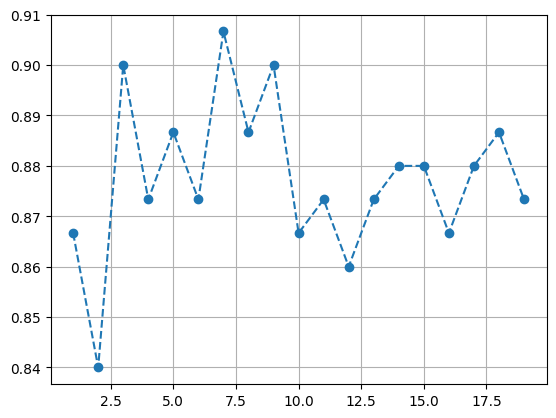

In [160]:
# 정확도 시각화(Elbow Method)
plt.plot(k_range,accuracies,marker='o', linestyle='--')
plt.grid(True)
plt.show()

In [161]:
max(accuracies) , np.argmax(accuracies), k_range[ np.argmax(accuracies) ]

(0.9066666666666666, np.int64(6), 7)